In [1]:
import numpy as np
from scipy.stats import genextreme
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)

In [2]:
df = pd.read_csv('BILBAO_daily.csv', sep=",")
# make 'DATE' the dataframe index
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')
# IMPORTANT!! daily precipitation data is in tenths of mm, divide by 10 to get it in mm.
df['PRCP'] = df['PRCP'] / 10
df

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
DATE,,,,,,,,,,,,,
1947-03-01,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN
1947-03-02,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.5,",,E",NaN,NaN,NaN,NaN,NaN,NaN
1947-03-03,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN
1947-03-04,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",3.3,",,E",NaN,NaN,NaN,NaN,NaN,NaN
1947-03-05,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",1.5,",,E",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.5,",,S",142.0,",,S",NaN,NaN,93.0,"H,,S"
2021-03-23,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.0,",,S",194.0,",,S",19.0,",,S",94.0,"H,,S"
2021-03-24,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.0,",,S",158.0,",,S",17.0,",,S",94.0,"H,,S"


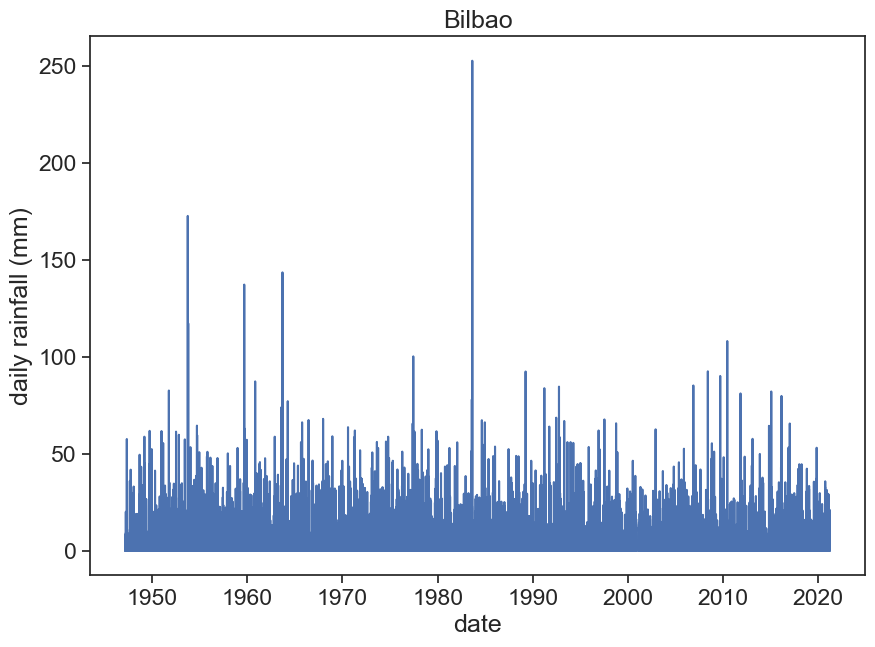

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(df['PRCP'])
ax.set_xlabel("date")
ax.set_ylabel("daily rainfall (mm)")
ax.set_title("Bilbao")
plt.savefig("bilbao-1947-2021.png")

In [6]:
df

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
DATE,,,,,,,,,,,,,
1947-03-01,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN
1947-03-02,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.5,",,E",NaN,NaN,NaN,NaN,NaN,NaN
1947-03-03,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN
1947-03-04,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",3.3,",,E",NaN,NaN,NaN,NaN,NaN,NaN
1947-03-05,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",1.5,",,E",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.5,",,S",142.0,",,S",NaN,NaN,93.0,"H,,S"
2021-03-23,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.0,",,S",194.0,",,S",19.0,",,S",94.0,"H,,S"
2021-03-24,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.0,",,S",158.0,",,S",17.0,",,S",94.0,"H,,S"


In [4]:
last_date = '2021-08-01'
first_date = '1947-08-01'
df = df[((df.index < last_date) & (df.index > first_date))]
df

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
DATE,,,,,,,,,,,,,
1947-08-02,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.0,",,E",256.0,",,E",148.0,",,E",NaN,NaN
1947-08-03,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.0,",,E",294.0,",,E",136.0,",,E",NaN,NaN
1947-08-04,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.0,",,E",250.0,",,E",154.0,",,E",NaN,NaN
1947-08-05,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.0,",,E",216.0,",,E",160.0,",,E",NaN,NaN
1947-08-06,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.0,",,E",268.0,",,E",124.0,",,E",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.5,",,S",142.0,",,S",NaN,NaN,93.0,"H,,S"
2021-03-23,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.0,",,S",194.0,",,S",19.0,",,S",94.0,"H,,S"
2021-03-24,SPE00120611,43.2981,-2.9056,42.0,"BILBAO AEROPUERTO, SP",0.0,",,S",158.0,",,S",17.0,",,S",94.0,"H,,S"


In [5]:
max_annual = (df['PRCP'].resample('A-JUL')
                        .max()
                        .to_frame()
             )
max_annual

,PRCP
DATE,
1948-07-31,41.8
1949-07-31,58.8
1950-07-31,61.8
1951-07-31,61.7
1952-07-31,82.6
...,...
2017-07-31,65.6
2018-07-31,44.6
2019-07-31,42.3


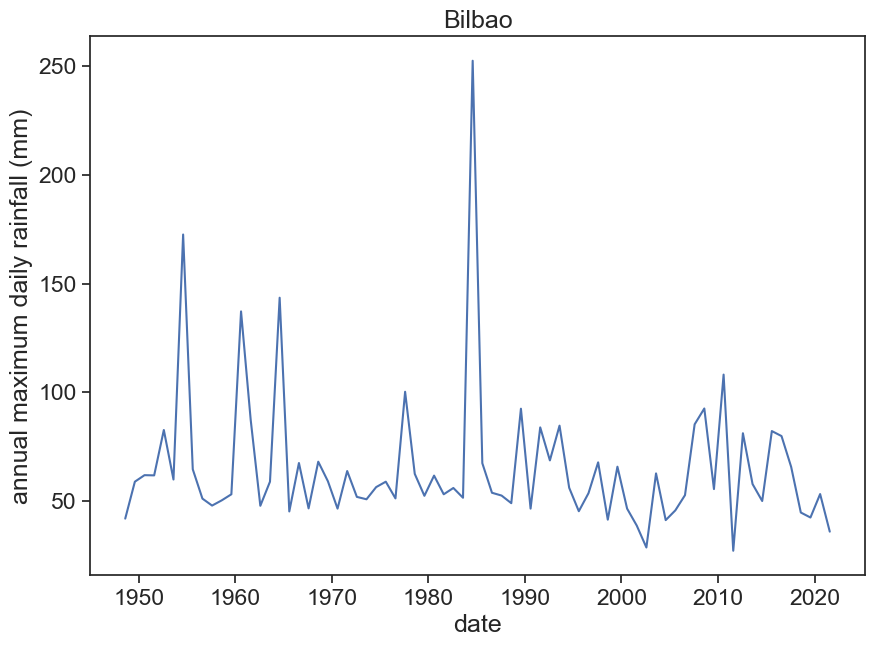

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(max_annual['PRCP'])
ax.set_xlabel("date")
ax.set_ylabel("annual maximum daily rainfall (mm)")
ax.set_title("Bilbao")
plt.savefig("bilbao-max-daily.png")

In [7]:
max_annual['max_sorted'] = np.sort(max_annual['PRCP'])
N = len(max_annual['max_sorted'])
order = np.arange(N)

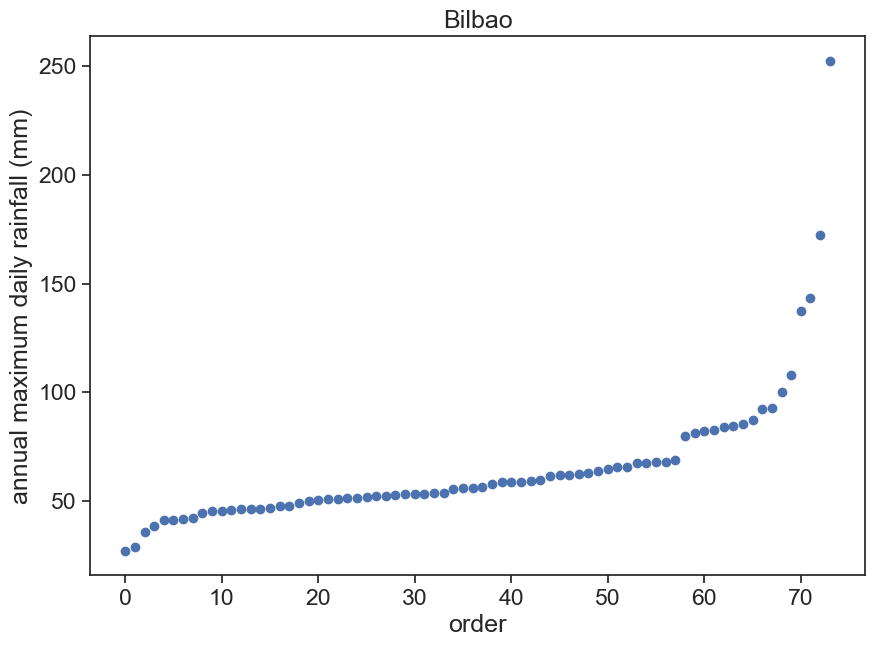

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(order, max_annual['max_sorted'].values, 'o')
ax.set_xlabel("order")
ax.set_ylabel("annual maximum daily rainfall (mm)")
ax.set_title("Bilbao")
plt.savefig("bilbao-max-daily-vs-order.png")

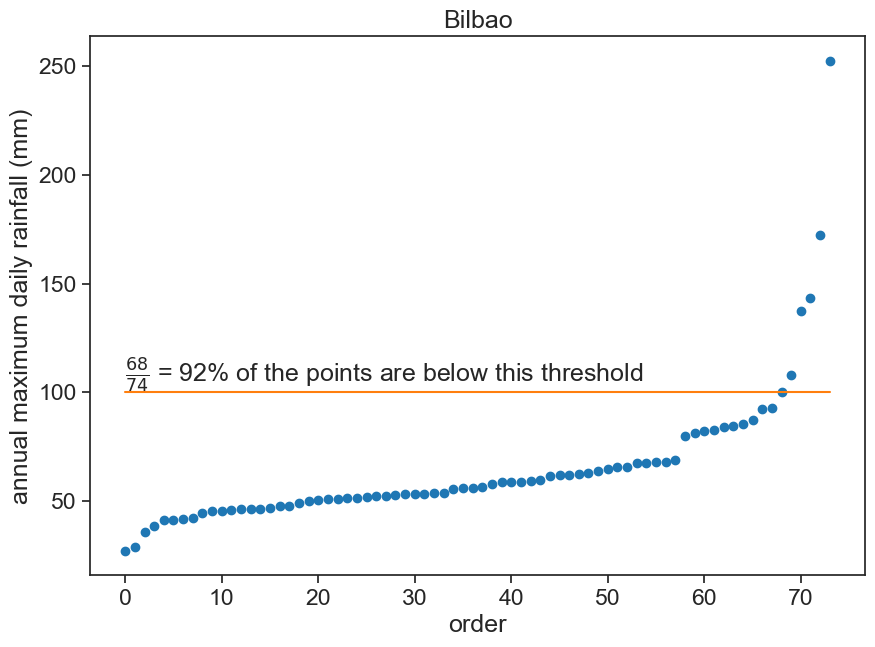

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(order, max_annual['max_sorted'].values, 'o', color='tab:blue')
ax.plot(order, 100 + 0*order, color="tab:orange")
ax.text(0, 105, r"$\frac{68}{74}$ = 92% of the points are below this threshold")
ax.set_xlabel("order")
ax.set_ylabel("annual maximum daily rainfall (mm)")
ax.set_title("Bilbao")
plt.savefig("bilbao-max-daily-vs-order-threshold.png")

In [13]:
# (max_annual['max_sorted'].values < 100).sum() 
fraction = order / N

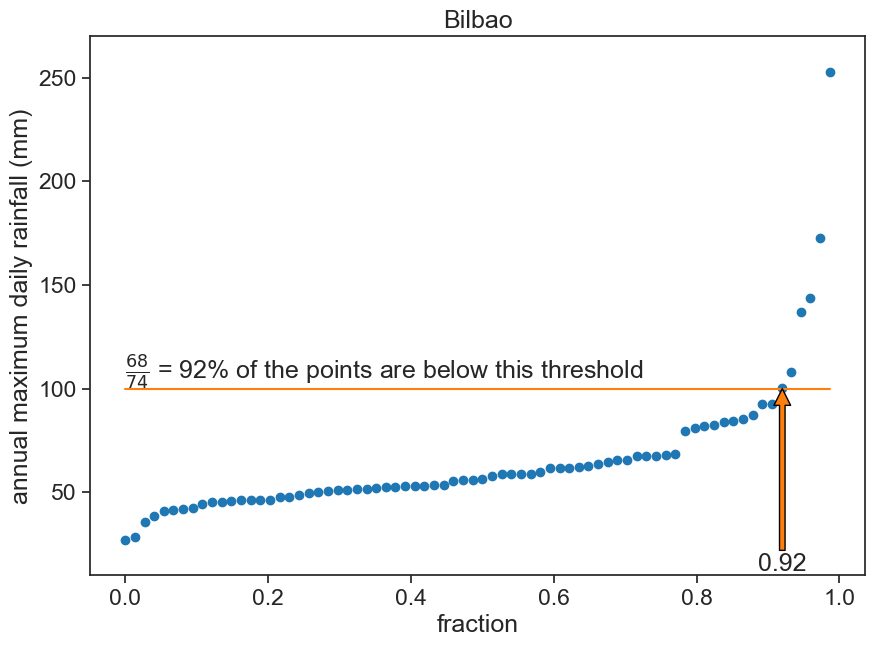

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(fraction, max_annual['max_sorted'].values, 'o', color='tab:blue')
ax.plot(fraction, 100 + 0*order, color="tab:orange")
ax.text(0, 105, r"$\frac{68}{74}$ = 92% of the points are below this threshold")
ax.text(0.92, 12, r"0.92", ha="center")
ax.annotate("",
            xy=(0.92, 100), xycoords='data',
            xytext=(0.92, 22), textcoords='data',
            # size=16,
            arrowprops=dict(facecolor='tab:orange',
                            edgecolor='black',
                            connectionstyle="arc3"),
            )
ax.set_xlabel("fraction")
ax.set_ylabel("annual maximum daily rainfall (mm)")
ax.set_title("Bilbao")
ax.set_ylim([10,270])
plt.savefig("bilbao-max-daily-vs-fraction-arrow.png")

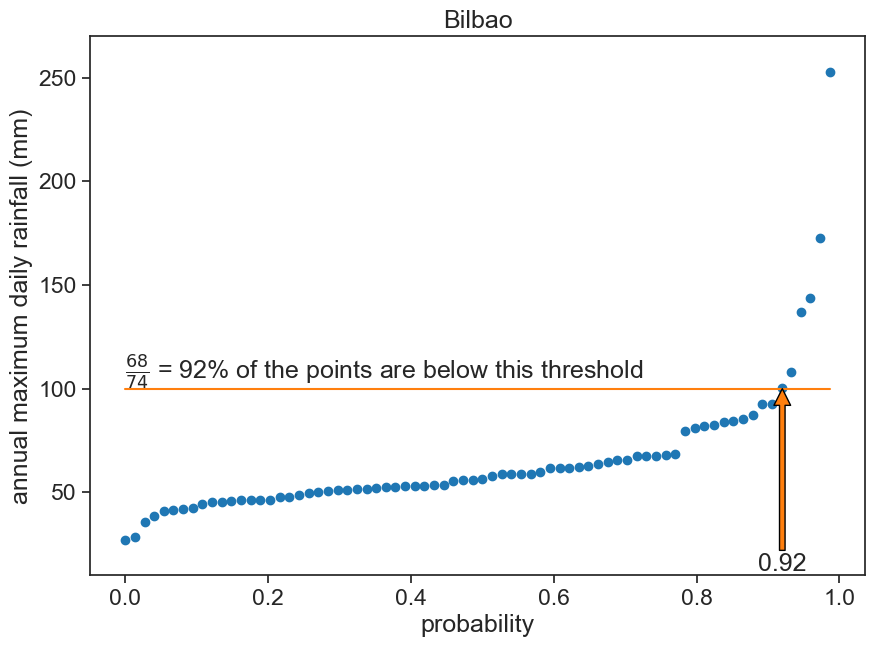

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(fraction, max_annual['max_sorted'].values, 'o', color='tab:blue')
ax.plot(fraction, 100 + 0*order, color="tab:orange")
ax.text(0, 105, r"$\frac{68}{74}$ = 92% of the points are below this threshold")
ax.text(0.92, 12, r"0.92", ha="center")
ax.annotate("",
            xy=(0.92, 100), xycoords='data',
            xytext=(0.92, 22), textcoords='data',
            # size=16,
            arrowprops=dict(facecolor='tab:orange',
                            edgecolor='black',
                            connectionstyle="arc3"),
            )
ax.set_xlabel("probability")
ax.set_ylabel("annual maximum daily rainfall (mm)")
ax.set_title("Bilbao")
ax.set_ylim([10,270])
plt.savefig("bilbao-max-daily-vs-probability.png")

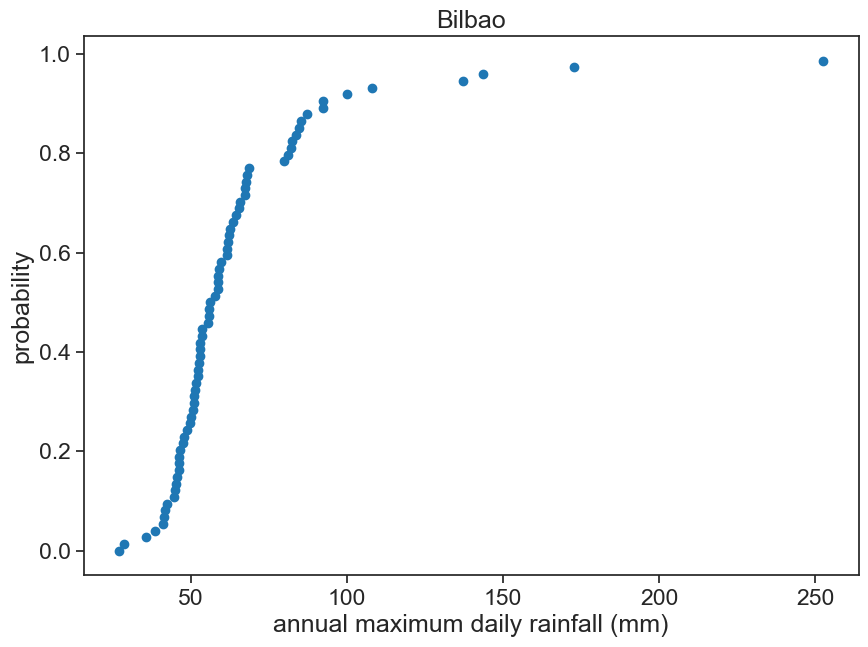

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(max_annual['max_sorted'].values, fraction, 'o', color='tab:blue')
ax.set_ylabel("probability")
ax.set_xlabel("annual maximum daily rainfall (mm)")
ax.set_title("Bilbao")
plt.savefig("bilbao-probability-vs-max-daily.png")

In [34]:
def gev(prec, c, loc, scale):
    return genextreme(c=c, loc=loc, scale=scale).cdf(prec)
 
popt1, pcov = curve_fit(f=gev,             # model function
                       xdata=max_annual['max_sorted'].values,              # x data
                       ydata=fraction,              # y data
                       p0=(-5.9, 30, 1),   # initial guess of the parameters
                          )
popt1

array([-0.38065168, 52.21987261, 11.60817676])

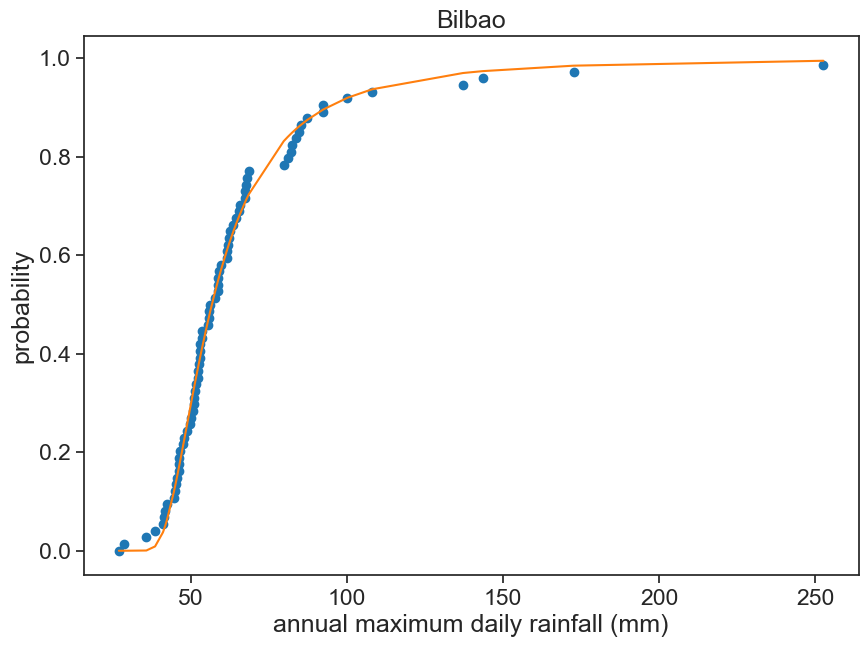

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
max_rain = max_annual['max_sorted'].values
ax.plot(max_rain, fraction, 'o', color='tab:blue')
ax.plot(max_rain, gev(max_rain, *popt), color="tab:orange")
ax.set_ylabel("probability")
ax.set_xlabel("annual maximum daily rainfall (mm)")
ax.set_title("Bilbao")
plt.savefig("bilbao-probability-vs-max-daily-fit.png")

In [36]:
def t_return(p):
    return 1 / (1 - p)

T_return = t_return(fraction)
T_return_fit = t_return(gev(max_rain, *popt1))

h=max_annual['PRCP'].values
popt2 = genextreme.fit(h)
T_return_fit2 = t_return(gev(max_rain, *popt2))

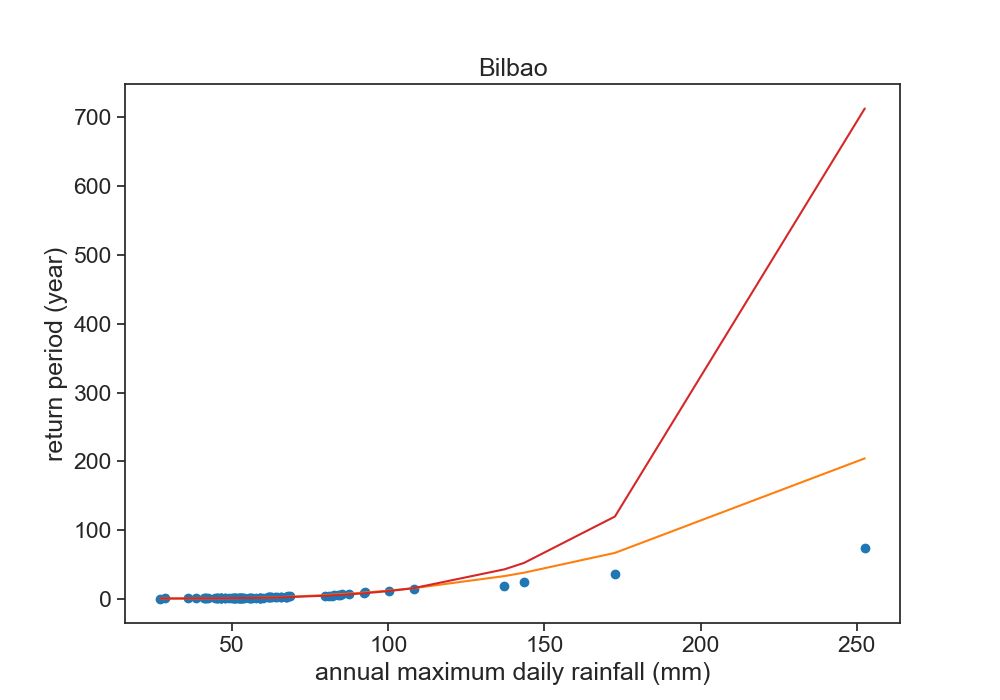

In [38]:
%matplotlib widget
fig, ax = plt.subplots(1, 1, figsize=(10,7))
max_rain = max_annual['max_sorted'].values
ax.plot(max_rain, T_return, 'o', color='tab:blue')
ax.plot(max_rain, T_return_fit, color="tab:orange")
ax.plot(max_rain, T_return_fit2, color="tab:red")

ax.set_ylabel("return period (year)")
ax.set_xlabel("annual maximum daily rainfall (mm)")
ax.set_title("Bilbao")
plt.savefig("bilbao-Treturn-vs-max-daily-fit.png")

In [31]:

popt_fit

(-0.18430835164528314, 52.23578922133636, 15.678377034189506)

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(max_annual['PRCP'])
ax.set_xlabel("date")
ax.set_ylabel("annual maximum daily rainfall (mm)")
ax.set_title("Bilbao")

In [9]:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]
x, y = ecdf(max_annual['PRCP'])
y

array([0.01470588, 0.02941176, 0.04411765, 0.05882353, 0.07352941,
       0.08823529, 0.10294118, 0.11764706, 0.13235294, 0.17647059,
       0.19117647, 0.20588235, 0.22058824, 0.23529412, 0.25      ,
       0.26470588, 0.27941176, 0.29411765, 0.30882353, 0.32352941,
       0.33823529, 0.35294118, 0.36764706, 0.38235294, 0.41176471,
       0.42647059, 0.44117647, 0.45588235, 0.47058824, 0.48529412,
       0.5       , 0.51470588, 0.54411765, 0.55882353, 0.57352941,
       0.58823529, 0.60294118, 0.61764706, 0.63235294, 0.64705882,
       0.66176471, 0.67647059, 0.69117647, 0.70588235, 0.72058824,
       0.73529412, 0.75      , 0.76470588, 0.77941176, 0.79411765,
       0.80882353, 0.82352941, 0.83823529, 0.85294118, 0.86764706,
       0.88235294, 0.89705882, 0.91176471, 0.92647059, 0.94117647,
       0.95588235, 0.97058824, 0.98529412, 1.        ])

In [14]:
x, counts = np.unique(max_annual['PRCP'], return_counts=True)
x,counts

(array([ 27. ,  28.5,  38.6,  41.1,  41.3,  44.6,  45.1,  45.2,  45.6,
         46.4,  46.5,  47.7,  47.8,  48.9,  49.9,  50.2,  50.7,  51. ,
         51.1,  51.4,  51.8,  52.3,  52.4,  52.6,  53. ,  53.5,  53.7,
         55.4,  55.9,  56. ,  56.3,  57.7,  58.8,  59. ,  59.8,  61.6,
         61.7,  62.4,  62.6,  63.7,  64.5,  65.6,  65.7,  67.3,  67.4,
         67.7,  68. ,  68.6,  79.8,  81.1,  82.1,  82.6,  83.8,  84.6,
         85.2,  87.3,  92.4,  92.5, 100.2, 108.1, 137.2, 143.5, 172.6,
        252.6]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [21]:
# cdf: https://stackoverflow.com/questions/3209362/how-to-plot-empirical-cdf-ecdf/11692365#11692365
x2 = np.sort(max_annual['PRCP'])
y2 = np.arange(len(x2))/float(len(x2))


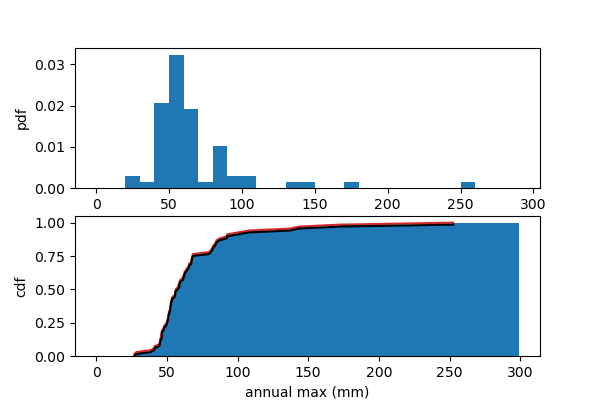

In [22]:
%matplotlib widget
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,4))

h=max_annual['PRCP'].values
ax1.hist(h, bins=np.arange(0,300,10), density=True)
cum = ax2.hist(h, bins=np.arange(0,300,1), cumulative=1, density=True)

ax2.plot(x,y, color="tab:red")
ax2.plot(x2,y2, color="black")

ax1.set(ylabel="pdf")
ax2.set(xlabel="annual max (mm)",
        ylabel="cdf",
        );

In [55]:
def gev(prec, c, loc, scale):
    return genextreme(c=c, loc=loc, scale=scale).cdf(prec)

In [9]:
def gev(prec, c, loc, scale):
    return genextreme(c=c, loc=loc, scale=scale).cdf(prec)
popt, pcov = curve_fit(f=gev,             # model function
                       xdata=x,              # x data
                       ydata=y,              # y data
                       p0=(-5.9, 30, 1),   # initial guess of the parameters
                          )
popt

array([-0.12607301, 50.93032292, 10.52955865])

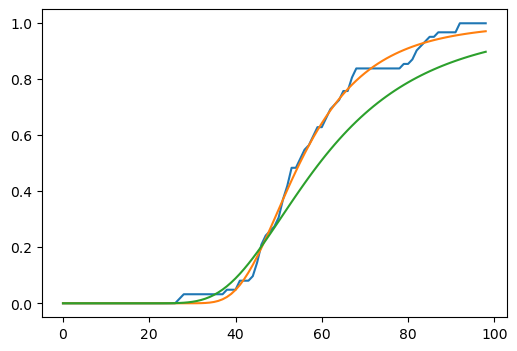

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
x = cum[1][:-1]
y = cum[0]
ax.plot(x, y)
ax.plot(x, gev(x, *popt))
ax.plot(x, gev(x, c_fit, loc_fit, scale_fit))

In [12]:
# h
c_fit, loc_fit, scale_fit = genextreme.fit(h)
c_fit

-0.18113061920445508

In [17]:
# h
c_fit, loc_fit, scale_fit = genextreme.cdf.fit(h)
c_fit

AttributeError: 'function' object has no attribute 'fit'

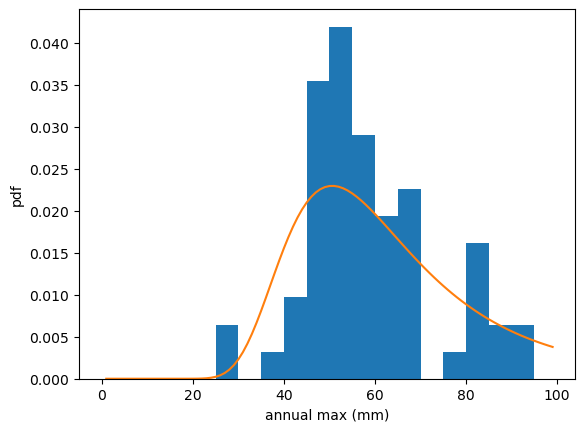

In [16]:
fig, ax = plt.subplots(1)

ax.hist(h, bins=np.arange(0,100,5), density=True)

ax.set(ylabel="pdf",
        xlabel="annual max (mm)")
p = np.arange(1,100)
ax.plot(p, genextreme(c=c_fit, loc=loc_fit, scale=scale_fit).pdf(p))

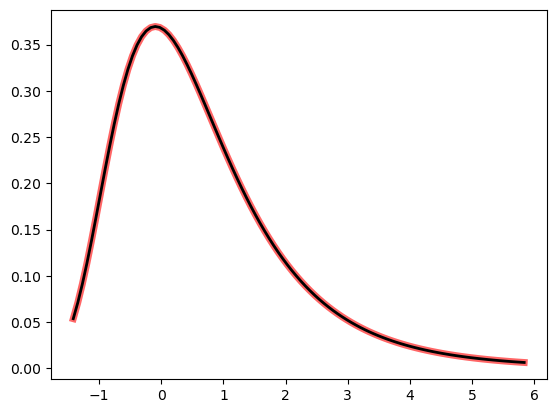

In [5]:
fig, ax = plt.subplots(1, 1)
c = -0.1
x = np.linspace(genextreme.ppf(0.01, c),
                genextreme.ppf(0.99, c), 100)
ax.plot(x, genextreme.pdf(x, c),
        'r-', lw=5, alpha=0.6, label='genextreme pdf')
rv = genextreme(c)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

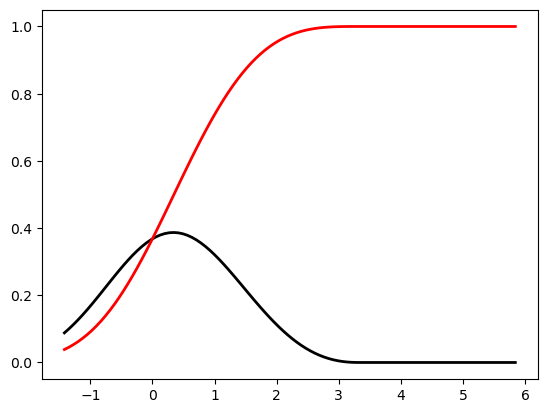

In [15]:
fig, ax = plt.subplots(1, 1)
c = 0.3
rv = genextreme(c)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.plot(x, rv.cdf(x), 'r-', lw=2, label='frozen pdf')